Zadanie 1. - Podział zbioru danych
Rozpocznij od podziału swojego zbioru danych (train and test lub K-fold cross validation).


In [111]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import time

# --- Wczytanie danych ---
df = pd.read_csv("nowy.csv", sep=',')
df['Potability'] = df['Potability'].astype(int)

# --- Podział na cechy i etykiety ---
X = df.drop('Potability', axis=1)
Y = df['Potability']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


Zadanie 2. - Generowanie drzew decyzyjnych
 Wykorzystaj swój zbiór treningowy do wygenerowania dwóch różnych drzew decyzyjnych, stosując różne
algorytmy generowania drzew. Upewnij się, że wybierasz algorytmy, które różnią się w podejściu do
tworzenia drzew (np. C4.5 oraz CART)

In [112]:
# --- 1 CART (Gini) ---
cart_clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
cart_clf.fit(x_train, y_train)
y_pred_cart = cart_clf.predict(x_test)
acc_cart = accuracy_score(y_test, y_pred_cart)


# --- 2️ Random Forest ---
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
rf_clf.fit(x_train, y_train)
y_pred_rf = rf_clf.predict(x_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

# --- 3 Extra Trees (losowe drzewo) ---
extra_clf = ExtraTreesClassifier(n_estimators=100, max_depth=4, random_state=42)
extra_clf.fit(x_train, y_train)
y_pred_extra = extra_clf.predict(x_test)
acc_extra = accuracy_score(y_test, y_pred_extra)

# --- Wyniki ---
print("=== Porównanie algorytmów ===")
print(f"CART (Gini):            {acc_cart*100:.2f}%")
print(f"Extra Trees (Random):   {acc_extra*100:.2f}%")
print(f"Random Forest:    {acc_rf*100:.2f}%")

=== Porównanie algorytmów ===
CART (Gini):            65.08%
Extra Trees (Random):   68.25%
Random Forest:    69.84%


Zadanie 3. - Eksperyment z głębokością drzew
dla reprezentacji wiedzy
 Dla każdego z wybranych algorytmów, dla treningowej części zbioru danych, wygeneruj drzewo decyzyjne
przy różnej maksymalnej głębokości. Na przykład, wygeneruj drzewa o maksymalnej głębokości 3, 5, 7, 9, 11
aby zobaczyć, jak głębokość wpływa na model.
 * Liczba węzłów w drzewie.
 Podczas tego etapu, zbadaj, jak zmieniają się kluczowe statystyki drzewa w zależności od jego głębokości,
takie jak:
 * Liczba liści (węzłów końcowych).
 * Złożoność modelu (np. czas treningu lub złożoność obliczeniowa)

In [113]:
# --- Lista głębokości ---
max_depths = [3, 5, 7, 9, 11]

# --- Funkcja do ewaluacji modelu ---
def evaluate_model(model_class, model_name, depths, x_train, y_train, x_test, y_test, n_estimators=100):
    results = []
    for depth in depths:
        if model_name == "Decision Tree":
            clf = model_class(max_depth=depth, random_state=42)
        else:
            clf = model_class(n_estimators=n_estimators, max_depth=depth, random_state=42)

        start_time = time.time()
        clf.fit(x_train, y_train)
        end_time = time.time()

        y_pred = clf.predict(x_test)

        results.append({
            "Model": model_name,
            "Depth": depth,
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred, zero_division=0),
            "Recall": recall_score(y_test, y_pred, zero_division=0),
            "F1": f1_score(y_test, y_pred, zero_division=0),
            "Train_time_sec": end_time - start_time
        })
    return results

# --- Zbieranie wyników ---
results = []
results += evaluate_model(DecisionTreeClassifier, "Decision Tree", max_depths, x_train, y_train, x_test, y_test)
results += evaluate_model(RandomForestClassifier, "Random Forest", max_depths, x_train, y_train, x_test, y_test)
results += evaluate_model(ExtraTreesClassifier, "Extra Trees", max_depths, x_train, y_train, x_test, y_test)

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by=["Depth", "Model"]).reset_index(drop=True)

results_df

,Model,Depth,Accuracy,Precision,Recall,F1,Train_time_sec
0,Decision Tree,3,0.690476,0.529412,0.439024,0.480000,0.002944
1,Extra Trees,3,0.690476,0.538462,0.341463,0.417910,0.047004
2,Random Forest,3,0.682540,0.520000,0.317073,0.393939,0.064294
3,Decision Tree,5,0.658730,0.476190,0.487805,0.481928,0.001353
4,Extra Trees,5,0.682540,0.512195,0.512195,0.512195,0.049639
5,Random Forest,5,0.698413,0.538462,0.512195,0.525000,0.074167
6,Decision Tree,7,0.626984,0.428571,0.439024,0.433735,0.001393
7,Extra Trees,7,0.666667,0.486486,0.439024,0.461538,0.055108
8,Random Forest,7,0.666667,0.487179,0.463415,0.475000,0.082913
9,Decision Tree,9,0.611111,0.413043,0.463415,0.436782,0.001356


Zadanie 4. - Porównanie wyników klasyfikacji
 Przeprowadź klasyfikację danych testowych za pomocą obu drzew decyzyjnych (każdego z algorytmów) dla
różnych maksymalnych głębokości. Porównaj wyniki klasyfikacji, analizując różne metryki, m.in dokładność

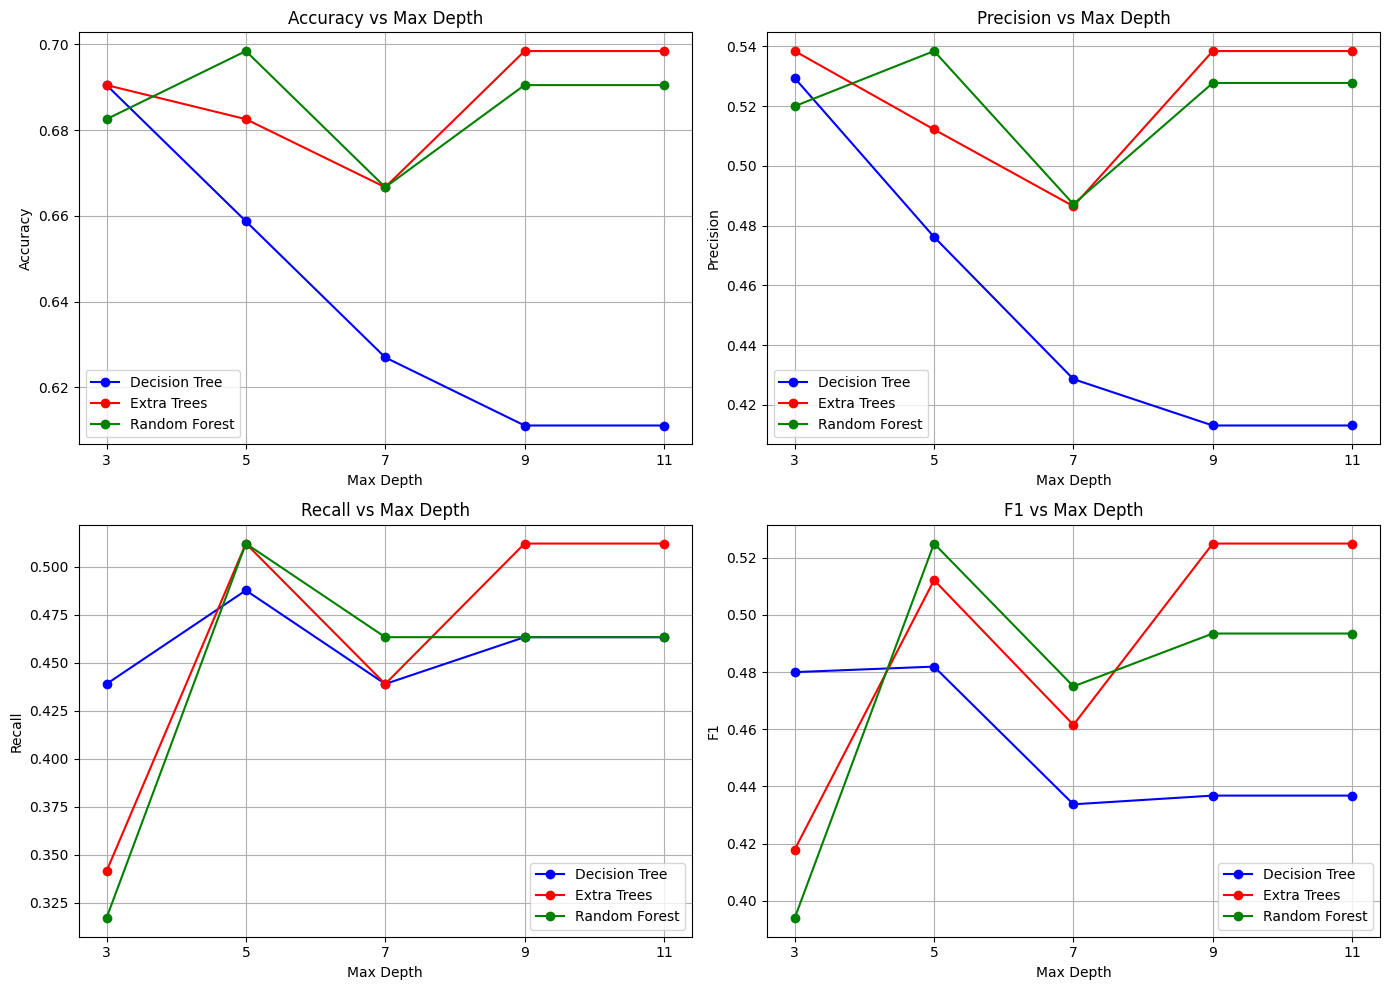

In [114]:
import matplotlib.pyplot as plt

metrics = ["Accuracy", "Precision", "Recall", "F1"]
colors = {"Decision Tree": "blue", "Random Forest": "green", "Extra Trees": "red"}

plt.figure(figsize=(14, 10))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)

    for model in results_df['Model'].unique():
        subset = results_df[results_df['Model'] == model]
        plt.plot(subset['Depth'], subset[metric], marker='o', color=colors[model], label=model)

    plt.title(f"{metric} vs Max Depth")
    plt.xlabel("Max Depth")
    plt.ylabel(metric)
    plt.xticks(max_depths)
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()



**Zadanie 5. - Analiza wyników
 Na podstawie uzyskanych wyników, przygotuj krótką analizę, w której porównasz efektywność obu
algorytmów oraz wpływ maksymalnej głębokości na jakość klasyfikacji i reprezentację wiedzy. Zastanów się,
które z drzew lepiej radziły sobie z danymi i dlaczego.**


Ponieważ w scikit-learn nie ma implementacji C4.5, jako kolejne algorytmy wybrałem Random Forest i Extra Trees, które różnią się konstrukcją drzew (modele ensemble zamiast pojedynczego drzewa).


Porównanie efektywności algorytmów
* Algorytmy użyte to: klasyczne drzewo decyzyjne CART (z kryterium gini), Random Forest oraz Extra Trees (losowe drzewa).

* Najwyższą skuteczność klasyfikacji (accuracy) osiąga Random Forest (~69.84%), następnie Extra Trees (~68.25%), a najniższą klasyczne drzewo CART (~65.08%) dla głębokości 4.

* Warto zauważyć, że algorytmy (Random Forest, Extra Trees) lepiej radzą sobie z danymi, dzięki agregacji wielu drzew redukują one ryzyko nadmiernego dopasowania i zwiększają odporność na szum.

* Drzewo CART prostsze pojedyncze drzewo ma niższą jakość predykcji.

Wpływ maksymalnej głębokości drzewa
* Maksymalna głębokość była badana na poziomach 3, 5, 7, 9, 11.

* Dla pojedynczego drzewa decyzyjnego obserwuje się spadek metryk (dokładność, precyzja, recall, F1) wraz ze wzrostem głębokości, co wskazuje na nadmierne dopasowanie (overfitting) i gorszą generalizację.

* Dla Random Forest i Extra Trees zauważalny jest wzrost skuteczności do pewnego punktu (głębokie drzewa o max głębokości 9 lub 11 dają lepsze wyniki), co jest możliwe dzięki efektowi agregacji i redukcji wariancji modelu.

* Głębsze drzewa zawierają więcej liści i szczegółowo reprezentują wiedzę, ale z ryzykiem nadmiernego dopasowania i wydłużonym czasem trenowania.

* Krótkie drzewa (mniejsze max depth) są prostsze, szybsze, mniej podatne na overfitting, ale mogą niedostatecznie uchwycić złożoność danych.

Które drzewa lepiej radziły sobie z danymi i dlaczego?
* Najlepsze wyniki klasyfikacji osiągnęły modele ensemble (Random Forest, Extra Trees), które są zbudowane na bazie wielu drzew i lepiej radzą sobie z niestabilnością i szumem danych.

* Pojedyncze drzewo CART jest prostsze i bardziej interpretowalne, ale mniej dokładne, zwłaszcza przy małej maksymalnej głębokości.

* Zatem, choć pojedyncze drzewa dają prostą reprezentację wiedzy, to algorytmy oparte na wielu drzewach zapewniają lepszą jakość klasyfikacji, zwłaszcza przy odpowiednio dobranej głębokości, która zapobiega overfittingowi.

Na podstawie tych wyników widać, że maksymalna głębokość drzew jest ważnym parametrem wpływającym na równowagę pomiędzy złożonością modelu a zdolnością generalizacji, a kompleksowe modele ensemble są efektywniejsze do klasyfikacji danych o umiarkowanej złożoności.